<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/MachineLearning_%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from elice_utils import EliceUtils
elice_utils = EliceUtils()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변환하기 위한 모듈을 불러옵니다.
from sklearn.preprocessing import PolynomialFeatures

def load_data():

    np.random.seed(0)

    X = 3*np.random.rand(50, 1) + 1
    y = X**2 + X + 2 +5*np.random.rand(50,1)

    return X, y

"""
1. PolynomialFeature 객체를 활용하여
   각 변수 값을 제곱하고,
   데이터에 추가하는 함수를 구현합니다.

   Step01. Polynomial 객체를
           생성합니다.

           degree를 2로 설정하고,
           include_bias 파라미터를
           True로 설정합니다.

   Step02. 변수 값을 제곱하고
           이를 X에 추가시킨 후
           poly_X에 저장합니다.
"""
def Polynomial_transform(X):

    poly_feat = PolynomialFeatures(degree=2, include_bias=True)

    poly_X = poly_feat.fit_transform(X)

    print("변환 이후 X 데이터\n",poly_X[:3])

    return poly_X

"""
2. 다중 선형회귀 모델을 불러오고,
   불러온 모델을 학습용 데이터에 맞추어
   학습시킨 후 해당 모델을 반환하는
   함수를 구현합니다.

   Step01. 사이킷런에 구현되어 있는
           다중 선형회귀 모델을 불러옵니다.

   Step02. 불러온 모델을 제곱값이 추가된
           데이터에 맞춰 학습시킵니다.
"""
def Multi_Regression(poly_x, y):

    multilinear = LinearRegression()

    multilinear.fit(poly_x, y)

    return multilinear


# 그래프를 시각화하는 함수입니다.
def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)

    plt.scatter(x, predicted,c='r')
    plt.savefig("test.png")
    elice_utils.send_image("test.png")


"""
3. 모델 학습 및 예측 결과 확인을 위한
   main 함수를 완성합니다.

   학습이 완료된 모델을 활용하여
   테스트 데이터에 대한 예측을 수행합니다.
"""
def main():

    X,y = load_data()

    poly_x = Polynomial_transform(X) # 데이터에 제곱한 변수가 추가된 데이터가 반환

    linear_model = Multi_Regression(poly_x,y)

    predicted = linear_model.predict(poly_x) # train, test 안나누고 전체데이터

    plotting_graph(X,y,predicted)

    return predicted

if __name__=="__main__":
    main()

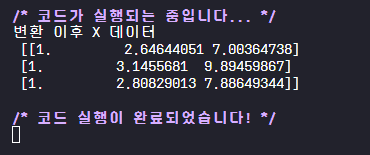

1은 include_bias 해줬기 때문.

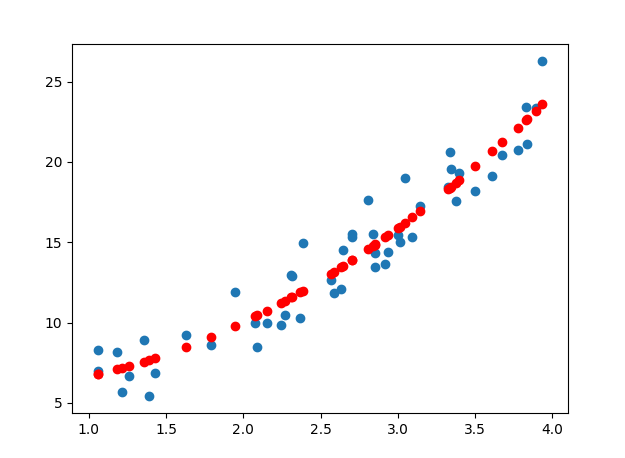